In [2]:
f = open("../mut_R/data/Hsap_indi_mut_eu_dxy_single.txt")
col_header = f.readline().split("\t")
sample_data = f.readline().split("\t")
print("column headers in the txt files are: \n{}\n".format(col_header))
print("Here is some sample data: \n{}\n\n".format(sample_data))
f.close()

tsv_reader = open("../mut_R/data/1000g_phase3_sample.tsv")
tsv_col_header = tsv_reader.readline().split("\t")
tsv_sample_data = tsv_reader.readline().split("\t")
print("column headers in the tsv files are: \n{}\n".format(tsv_col_header))
print("Here is some sample data: \n{}".format(tsv_sample_data))
tsv_reader.close()

column headers in the txt files are: 
['ind1', 'ind2', 'euclidean', 'dxy', 'dxy_bp\n']

Here is some sample data: 
['HG00096', 'HG00097', '0.000491881029589382', '2409825', '0.00118147026499175\n']


column headers in the tsv files are: 
['Sample name', 'Sex', 'Biosample ID', 'Population code', 'Population name', 'Superpopulation code', 'Superpopulation name', 'Population elastic ID', 'Data collections\n']

Here is some sample data: 
['HG00174', 'female', 'SAME124958', 'FIN', 'Finnish,Finnish', 'EUR', 'European Ancestry,West Eurasia (SGDP)', 'FIN,FinnishSGDP', '1000 Genomes on GRCh38,Simons Genome Diversity Project,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release,1000 Genomes phase 1 release,Geuvadis\n']


In [4]:
import gzip
import vcf
vcf_reader = vcf.Reader(open('../mut_R/data/chr1.wmask.bi.vcf'))

In [ ]:
# dir(vcf_reader)
multiple_alt_count = 0
total_count = 0
# print(vcf_reader.__next__().ALT)
for record in vcf_reader:
    if len(record.ALT) > 1:
        multiple_alt_count = multiple_alt_count + 1 
    total_count = total_count + 1

print(total_count)
print(multiple_alt_count)
#vcf_reader.alts

In [3]:
tsv_reader = open("../mut_R/data/1000g_phase3_sample.tsv")
tsv_reader.readline() # skip past the first line with the column headers
id_super_pop = dict()
for line in tsv_reader:
    temp_arr = line.split("\t")
    id_name = temp_arr[0]
    super_pop_code = temp_arr[5]
    id_super_pop[id_name] = super_pop_code
tsv_reader.close()
import random
print(random.sample(id_super_pop.items(), 5))
print("There are {} samples in the tsv file".format(len(id_super_pop)))

[('NA19677', 'AMR'), ('HG02237', 'EUR'), ('HG04018', 'SAS'), ('NA10852', 'EUR'), ('HG03705', 'SAS')]
There are 3115 samples in the tsv file


In [4]:
import pandas as pd
data = pd.read_csv("../mut_R/data/Hsap_indi_mut_eu_dxy_single.txt", delimiter = "\t")
print(data.head())
print("The number of elements in the dataframe: {}".format(len(data)))

      ind1     ind2  euclidean      dxy    dxy_bp
0  HG00096  HG00097   0.000492  2409825  0.001181
1  HG00096  HG00099   0.001151  2390315  0.001172
2  HG00096  HG00100   0.000674  2419069  0.001186
3  HG00096  HG00101   0.000768  2405440  0.001179
4  HG00096  HG00102   0.000793  2405205  0.001179
The number of elements in the dataframe: 3133756


In [9]:
def assign_super_grp(row):
    ind1 = row["ind1"]
    ind2 = row["ind2"]
    if ind1 in id_super_pop and ind2 in id_super_pop:
        super_pop_ind1 = id_super_pop[ind1]
        super_pop_ind2 = id_super_pop[ind2]
        if super_pop_ind1 <= super_pop_ind2:
            super_pop_pair = super_pop_ind1 + "_" + super_pop_ind2
        else:
            super_pop_pair = super_pop_ind2 + "_" + super_pop_ind1
    else:
        super_pop_pair = None
    return super_pop_pair 

In [24]:
import time
start_time = time.time()
data_sample = data.sample(n=10000)
data_sample["super_pop_pair"] = data_sample.apply(assign_super_grp, axis=1)
print("assigning super groups tooks: {}".format(time.time() - start_time))
print(data_sample.head())

assigning super groups tooks: 11.182490110397339
            ind1     ind2  euclidean      dxy    dxy_bp super_pop_pair
1536223  HG01967  HG02052   0.006641  3552227  0.001742        AFR_AMR
3055922  NA19338  NA21118   0.005417  3484232  0.001708        AFR_SAS
1312956  HG01757  HG02558   0.005778  3453836  0.001693        AFR_EUR
1926463  HG02470  NA18879   0.000985  3334112  0.001635        AFR_AFR
2439678  HG03517  NA11894   0.005208  3572198  0.001751        AFR_EUR


In [15]:
from matplotlib import pyplot as plt
dxy = 
data_sample["dxy_bp"].head()
data_sample["euclidean"].head()

2359912    0.004415
416485     0.001226
2604133    0.001415
2161537    0.000579
2347561    0.005080
Name: euclidean, dtype: float64

[1900000, 3750000, 0, 0.009]

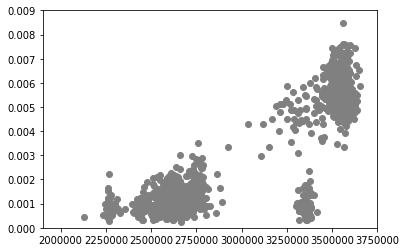

In [23]:
dxy = data_sample["dxy"]
# dxy_max = dxy.max()
# dxy_min = dxy.min()
euclidean = data_sample["euclidean"]
# euclidean_max = euclidean.max()
# euclidean_min = euclidean.min()
plt.scatter(data_sample["dxy"], data_sample["euclidean"], c="grey")
plt.axis([1900000, 3750000, 0, 0.009])